In [1]:
import vco
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt

%matplotlib inline

Initialize a 6x12 VCO matrix with a ringsize of 12 and 0 phase noise.

In [2]:
VCOmat = [[],[],[],[],[],[]]

numrow, numcol = 6, 12
ringsize = 12
minrho = 0.14
rotation_angle = 0
rhos = minrho * (np.sqrt(3)**(np.arange(numrow)))
thetas = np.pi + rotation_angle + 2*np.pi*(np.arange(numcol))/numcol 
phz_noise = 0

for row in range(numrow):
    for col in range(numcol):
        VCOmat[row].append(vco.VCO_model(ringsize, rhos[row], thetas[col], phz_noise))

Randomly choose 1000 grid cell connectivity patterns. The algorithm is as follows:

* Randomly choose row: 1 in 6
* Randomly choose columns: 3 in 12
* At each point (row, columns[0:2]), choose cell: 1 in 12

In [3]:
n_inputs = 3
n_mats = 1000
rd_wts = np.full([numrow,numcol,n_mats], np.nan)

for mat in range(n_mats):
    random_row = nprd.randint(numrow)
    random_cols = np.arange(numcol)
    nprd.shuffle(random_cols)

    for col in random_cols[:n_inputs]:
        rd_wts[random_row, col, mat] = nprd.randint(ringsize)

In [4]:
size = 10
rd_outputs = np.zeros((10*size,10*size,n_mats,2))
for i in range(n_mats):
    norm_env, env_prod  = vco.theta_to_grid(VCOmat, rd_wts[:,:,i], size)
    rd_outputs[:,:,i,0] = norm_env
    rd_outputs[:,:,i,1] = env_prod

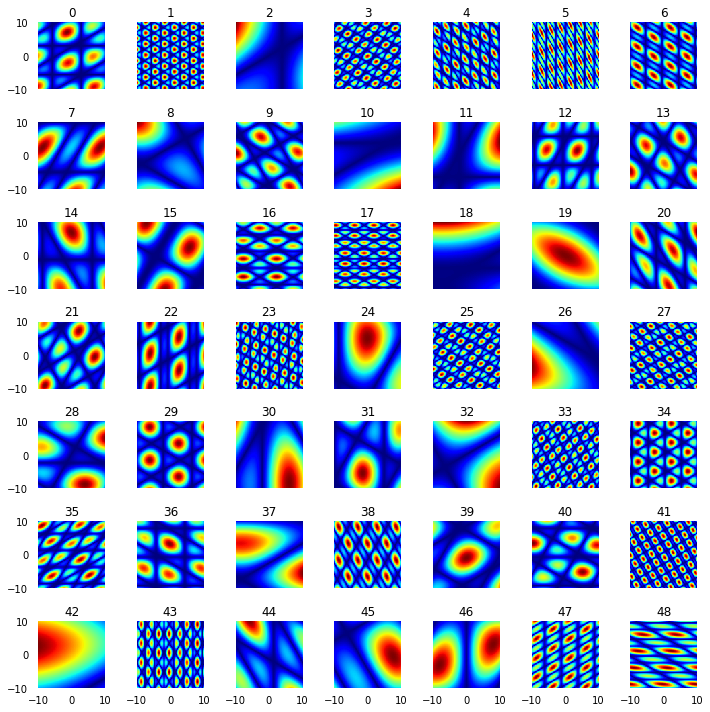

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=7, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 

for idx in range(49):
    ax = axes_list.pop(0)
    ax.imshow(rd_outputs[:,:,idx,1],cmap='jet',extent=(-size,size,-size,size))
    ax.set_title(idx)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.tight_layout()

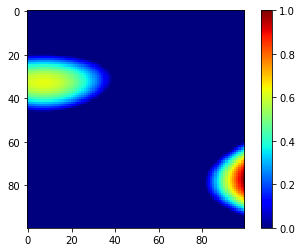

In [6]:
plt.imshow(rd_outputs[:,:,37,0],cmap='jet')
plt.colorbar()

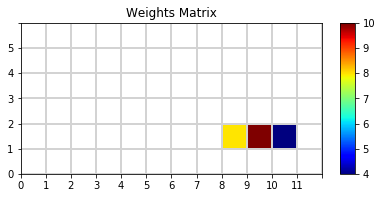

In [7]:
vco.plot_weights(rd_wts[:,:,37])

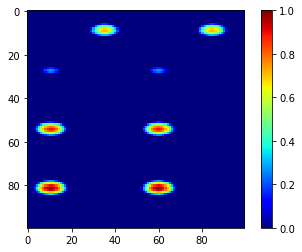

In [8]:
plt.imshow(rd_outputs[:,:,16,0],cmap='jet')
plt.colorbar()

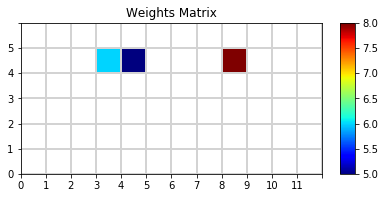

In [10]:
vco.plot_weights(rd_wts[:,:,16])

In [11]:
max_response_weights=np.full([6,12],np.nan)
max_response_weights[4,2] = 1
max_response_weights[4,6] = 1
max_response_weights[4,10] = 1

print(np.max(vco.theta_to_grid(VCOmat, max_response_weights, 20)[1]))

7.99778792094


In [12]:
mx = np.max(rd_outputs)